In [ ]:
# Objective:
# To perform Analysis on the number of cases created in zendesk in last two weeks

In [32]:
# I was planning to use ticket.json endpoint, however this endpoint does not include query parameters to limit the search. 
# Need to use search api instead

In [224]:
#from urllib.parse import urlencode
try: # For python2
    import urlparse
    from urllib import urlencode
except: # For Python 3
    import urllib.parse as urlparse
    from urllib.parse import urlencode
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
# Section to add the variables
#Define Variables

zd_addr="<Domain Name>.zendesk.com"

zd_user_token="XXXXXXXXXXXXXXXXXXXXXXX"

zd_user='<Email ID>'  + '/token'  # Format for user name with Token required by zendesk
day=14 # Number of days for which we need report
org='<Org name>' # Organization for which we need to generate report

In [226]:
#Start and End date to plot the graph
start_dt=(date.today() - datetime.timedelta(days=day)).strftime("%Y-%m-%d")
end_dt=date.today().strftime("%Y-%m-%d")

params = {    
    'query': 'type:ticket organization:'+org+' created>'+start_dt +' created<'+end_dt,
    'sort_by': 'created_at',
    'sort_order': 'desc',        # from oldest to newest
}


url = 'https://'+zd_addr+'/api/v2/search.json?' + urlencode(params)

In [227]:
response = requests.get(url, auth=(zd_user, zd_user_token))

if response.status_code != 200:
    print('Status:', response.status_code, 'Problem with the request. Exiting.')    
    exit()
# Print the subject of each ticket in the results

data = response.json()
df = pd.DataFrame(columns=['create_date']) # To store the data in df DataFrame for plotting later 
for result in data['results']:
    dt=pd.to_datetime(result['created_at'],format="%Y-%m-%d").date() # Convert string to datetime object
    row = pd.DataFrame({'create_date':[dt]}) # Convert datetime object in DataFrame
    df=pd.concat([df, row], axis=0,ignore_index=True) # Append row dataframe to df dataframe

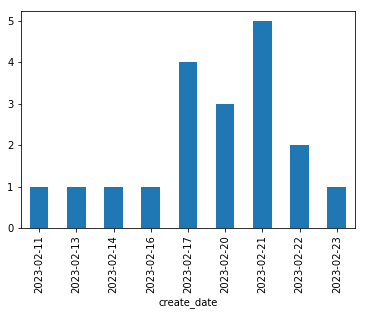

In [228]:
#Bar graph of Case reported
df_gb = df.groupby(['create_date']).size()
df_gb.plot(kind = 'bar')

In [229]:
# Capture data in DataFrame
cases_df=pd.DataFrame(columns=['id','priority','created_date','subject','environment','case_status'])
for i in range(0,data['count']):
    cases_df.loc[len(cases_df.index)] = [data['results'][i]['id'],data['results'][i]['priority'],data['results'][i]['created_at'],data['results'][i]['raw_subject'],data['results'][i]['custom_fields'][1]['value'],data['results'][i]['status']] 
cases_df
cases_df['subject']='XXXXXXXXXX' #Masking the data for demo
cases_df['created_date']='YYYYYYYY' #Masking the data for demo

In [230]:
cases_df[cases_df['environment']=='prod']

,id,priority,created_date,subject,environment,case_status
0,5714,high,YYYYYYYY,XXXXXXXXXX,prod,solved
2,5669,urgent,YYYYYYYY,XXXXXXXXXX,prod,pending
3,5658,normal,YYYYYYYY,XXXXXXXXXX,prod,solved
6,5653,high,YYYYYYYY,XXXXXXXXXX,prod,open
8,5648,normal,YYYYYYYY,XXXXXXXXXX,prod,pending
10,5642,high,YYYYYYYY,XXXXXXXXXX,prod,solved
14,5620,high,YYYYYYYY,XXXXXXXXXX,prod,pending
17,5556,high,YYYYYYYY,XXXXXXXXXX,prod,solved
18,5551,urgent,YYYYYYYY,XXXXXXXXXX,prod,closed


In [231]:
print ("Total number of case  "+ str(len(cases_df)))

Total number of case  19
